# Exploratory Data Analysis
In this notebook Exploratory Data Analysis is performed on the Price Runner Dataset. 
## Overview
* Checked for duplicates or nan values.
* Class Distribution of Product Category
* Product Distribution of Merchant ID
* Product Distribution amoung Clusters
* Distribution of words, average word length in Product Title & Cluster Names

In [97]:
# Import Necessary Packages
import os
import re
import json
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils.helper_functions import lower_text, remove_punctuation, remove_stopwords

sns.set_theme(rc={'figure.figsize':(16,8)})
ROOT_DATA_PATH = 'data/'

In [2]:
dataset = pd.read_csv(os.path.join(ROOT_DATA_PATH, 'pricerunner_aggregate.csv'))

### Rename column names because some column names have whitespace 

In [3]:
dataset = dataset.rename({'Product ID' : 'product_id', 'Product Title': 'product_title', ' Merchant ID' : 'merchant_id',
                    ' Category ID' : 'category_id', ' Category Label' : 'category_label', ' Cluster ID': 'cluster_id', ' Cluster Label' : 'cluster_label'}, axis=1)

In [4]:
dataset.head()

,product_id,product_title,merchant_id,cluster_id,cluster_label,category_id,category_label
0,1,apple iphone 8 plus 64gb silver,1,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
1,2,apple iphone 8 plus 64 gb spacegrau,2,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
2,3,apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...,3,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
3,4,apple iphone 8 plus 64gb space grey,4,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones
4,5,apple iphone 8 plus gold 5.5 64gb 4g unlocked ...,5,1,Apple iPhone 8 Plus 64GB,2612,Mobile Phones


In [5]:
print('No of Data Points : ', dataset.shape)

No of Data Points :  (35311, 7)


## Checking for Duplicates or NAN

In [6]:
print('No of NAN')
print(dataset.isna().sum())

No of NAN
product_id        0
product_title     0
merchant_id       0
cluster_id        0
cluster_label     0
category_id       0
category_label    0
dtype: int64


In [7]:
print('No of Duplicates', dataset.duplicated().sum())

No of Duplicates 0


In [8]:
print('No of unique Product Id : ', len(np.unique(dataset['product_id'])))
print('No of unique Merchant Id : ', len(np.unique(dataset['merchant_id'])))
print('No of unique Cluster Id : ', len(np.unique(dataset['cluster_id'])))
print('No of unique Cluster Label : ', len(np.unique(dataset['cluster_label'])))
print('No of unique Category Id : ', len(np.unique(dataset['cluster_id'])))
print('No of unique Category Label : ', len(np.unique(dataset['category_label'])))


No of unique Product Id :  35311
No of unique Merchant Id :  306
No of unique Cluster Id :  13233
No of unique Cluster Label :  12849
No of unique Category Id :  13233
No of unique Category Label :  10


## CountPlot of Category Label

<Axes: xlabel='category_label', ylabel='count'>

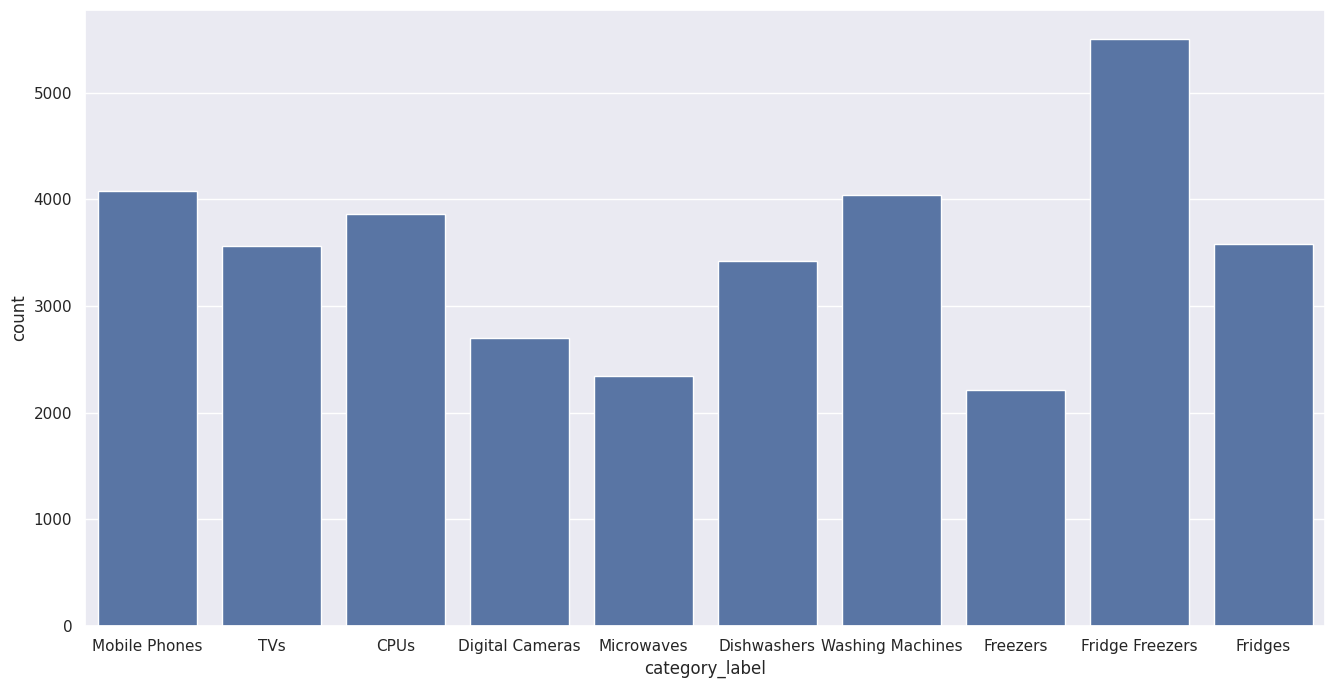

In [9]:
sns.countplot(dataset, x='category_label')

In [10]:
agg_category_data = dataset.groupby('category_label')[['product_id']].count().reset_index()

In [11]:
print(agg_category_data)

     category_label  product_id
0              CPUs        3862
1   Digital Cameras        2697
2       Dishwashers        3424
3          Freezers        2212
4   Fridge Freezers        5501
5           Fridges        3584
6        Microwaves        2342
7     Mobile Phones        4081
8               TVs        3564
9  Washing Machines        4044


In [12]:
print(agg_category_data['product_id'].describe())

count      10.000000
mean     3531.100000
std       967.270782
min      2212.000000
25%      2878.750000
50%      3574.000000
75%      3998.500000
max      5501.000000
Name: product_id, dtype: float64


In [13]:
class_distribution = agg_category_data['product_id']/agg_category_data['product_id'].sum()

In [14]:
print(class_distribution)

0    0.109371
1    0.076378
2    0.096967
3    0.062643
4    0.155787
5    0.101498
6    0.066325
7    0.115573
8    0.100932
9    0.114525
Name: product_id, dtype: float64


### The class distribution is almost balanced except of Freezers and Microwave class
### Analysis of Merchant Id

<Axes: xlabel='merchant_id', ylabel='count'>

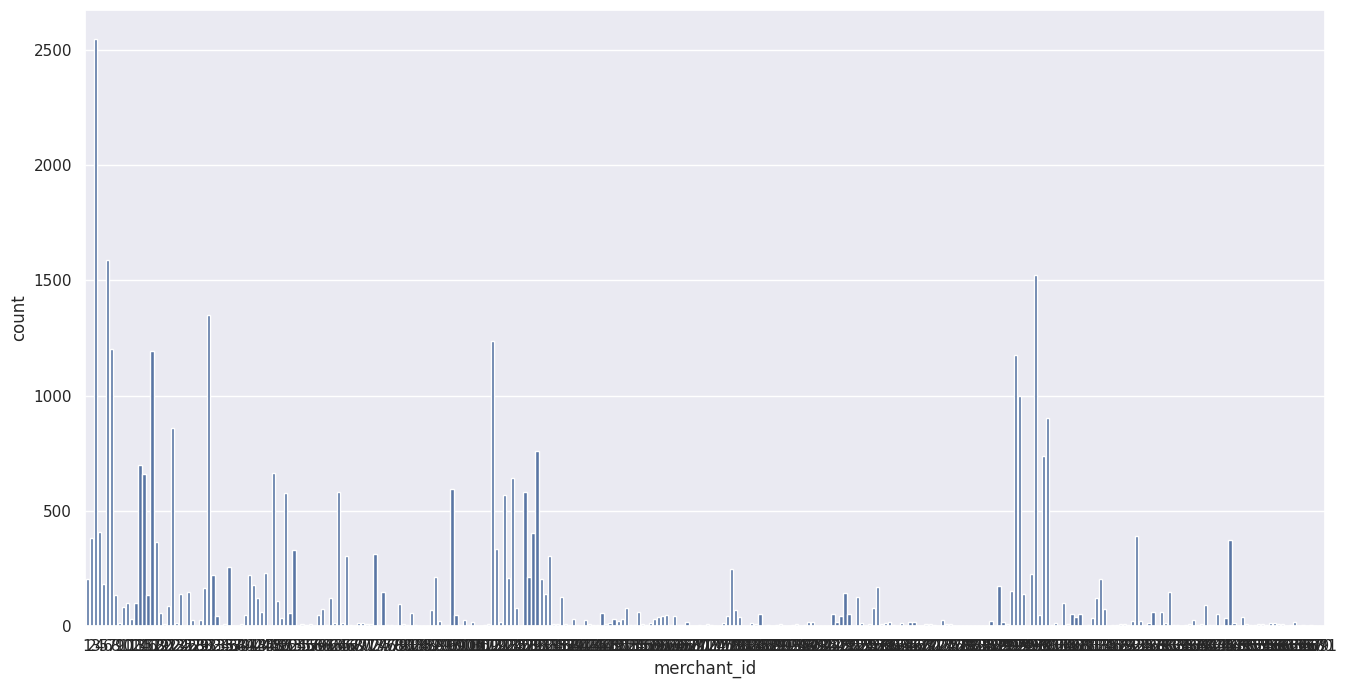

In [15]:
sns.countplot(dataset, x='merchant_id')

In [16]:
agg_merch_data = dataset.groupby('merchant_id')['product_id'].count().reset_index()

In [17]:
agg_merch_data['product_id'].describe()

count     306.000000
mean      115.395425
std       284.244891
min         1.000000
25%         3.000000
50%        11.000000
75%        73.750000
max      2547.000000
Name: product_id, dtype: float64

### Comments on Merchant ID
Products are distributed skewlly among the merchants. More than 50% of merchants have less than half the mean number of products. Some merchants have huge numbers of Products. Also the merchant_id has value (1-n) i.e. idx so not very useful feature for product classification. 

### Analysis of Clusters

In [18]:
agg_clusterid_data = dataset.groupby('cluster_id')['product_id'].count().reset_index()

In [19]:
agg_clusterid_data['product_id'].describe()

count    13233.000000
mean         2.668405
std          2.473239
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         27.000000
Name: product_id, dtype: float64

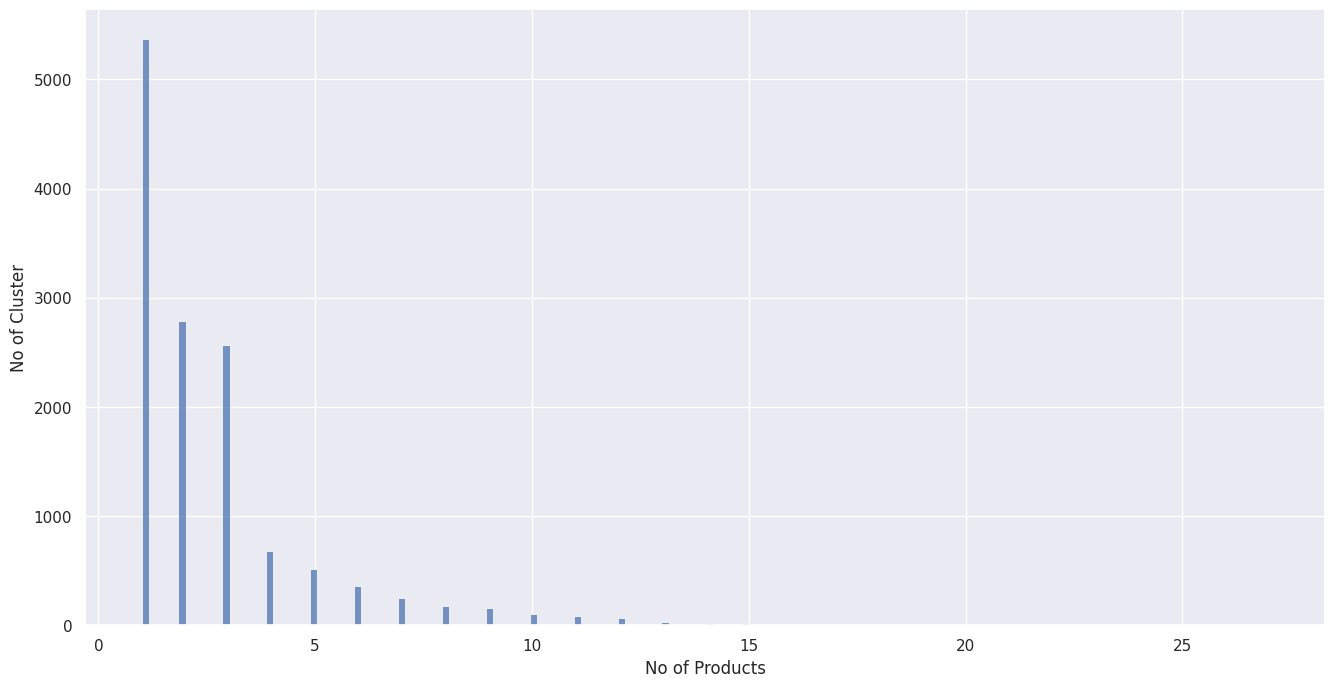

In [20]:
ax = sns.histplot(agg_clusterid_data, x='product_id')
ax.set(xlabel='No of Products', ylabel='No of Cluster')
plt.show()

In [21]:
agg_clusterlabel_data = dataset.groupby('cluster_label')['product_id'].count().reset_index()

In [22]:
agg_clusterlabel_data['product_id'].describe()

count    12849.000000
mean         2.748152
std          2.525878
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         27.000000
Name: product_id, dtype: float64

### Comments on Cluster Name
* The mean products per cluster is 2.7 and 50% of cluster have 2 or less products in them.
* There are 13,233 unique cluster id but 12,849 unique cluster name i.e. some cluster names have 2 cluster ids

In [23]:
unique_cluster_ids = dataset[~dataset.duplicated('cluster_id')]

In [24]:
duplicated_cluster_labels = unique_cluster_ids[unique_cluster_ids.duplicated('cluster_label')]

In [25]:
dataset[dataset['cluster_label'].isin(duplicated_cluster_labels['cluster_label'])].drop_duplicates(['cluster_id', 'cluster_label'])

,product_id,product_title,merchant_id,cluster_id,cluster_label,category_id,category_label
1631,1633,xiaomi mi a1 32gb rose gold,24,230,Xiaomi Mi A1 32GB Dual SIM,2612,Mobile Phones
1644,1646,mi a1 32gb gold,42,234,Xiaomi Mi A1 32GB Dual SIM,2612,Mobile Phones
2139,2145,htc 90haly017 00 htc u play iceberg white,17,392,HTC U Play 32GB Dual SIM,2612,Mobile Phones
3258,3268,u play 64gb ice white,42,1067,HTC U Play 32GB Dual SIM,2612,Mobile Phones
8974,15120,amd a8 x4 7650k cpu with quiet cooler fm2 3.3g...,18,6179,AMD A8-7650K 3.3GHz Box,2615,CPUs
...,...,...,...,...,...,...,...
30116,41736,britannia 544446218 breeze retro fridge with i...,128,44936,Britannia Breeze Retro Black,2622,Fridge Freezers
33970,45968,381litre retro fridge class a black,123,46633,Britannia Breeze Retro Black,2623,Fridges
34022,46022,swan sr11050 60cm retro tall larder fridge blue,1,46652,Swan SR11050BLN Blue,2623,Fridges
34529,46543,381litre retro fridge class a red,123,46883,Britannia Breeze Retro Red,2623,Fridges


## Analysis of Tokens in Product Title & Cluster Label

In [26]:
dataset['product_title'] = dataset['product_title'].apply(lambda x : x.lower())

In [27]:
dataset['product_title_token_len'] = dataset['product_title'].apply(lambda x : len(x.split(' ')))

In [28]:
dataset['product_title_char_len'] = dataset['product_title'].apply(lambda x : len(x.replace(' ', '')))

In [29]:
classes = np.unique(dataset['category_label'])

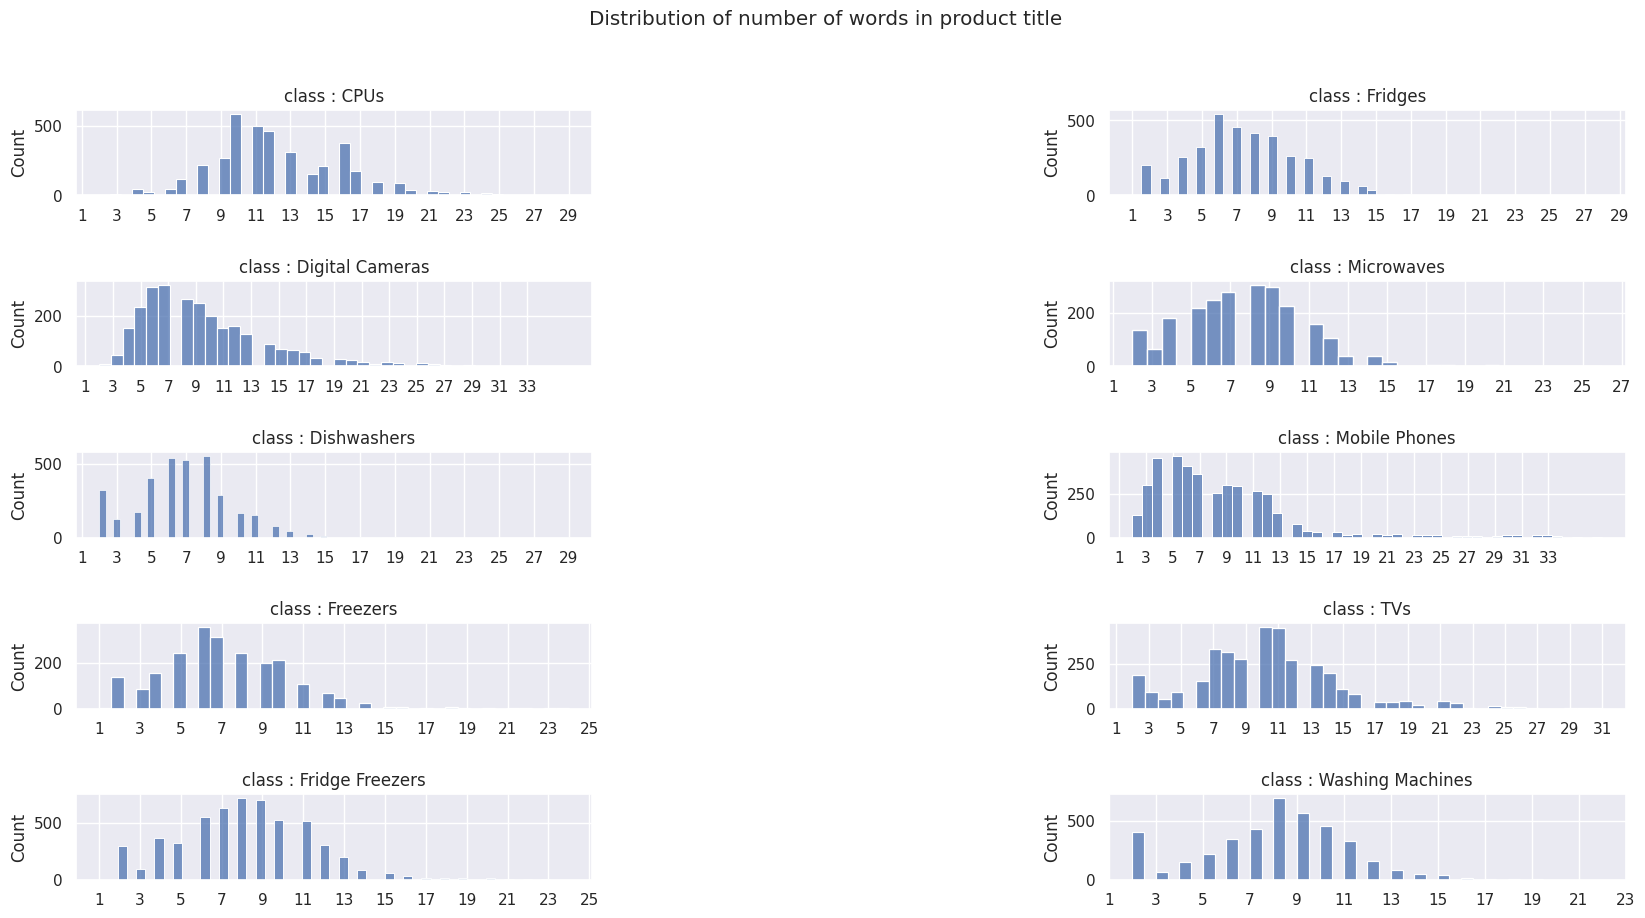

In [30]:
fig, ax = plt.subplots(5, 2, figsize = (20, 10), sharey = False)
fig.subplots_adjust(hspace=1, wspace=1)
plt.setp(ax, xticks=[x for x in range(1, 35, 2)])
fig.suptitle("Distribution of number of words in product title")
for i, class_name in  enumerate(classes):
    if i < 5:
        ax_idx = ax[i, 0]
    else:
        ax_idx = ax[i%5, 1]
    sns.histplot(dataset.loc[dataset['category_label'] == class_name]['product_title_token_len'].to_numpy(), ax=ax_idx).set_title(f'class : {class_name}')        

In [31]:
dataset['product_title_token_len'].describe()

count    35311.000000
mean         8.665911
std          4.166677
min          1.000000
25%          6.000000
50%          8.000000
75%         11.000000
max         37.000000
Name: product_title_token_len, dtype: float64

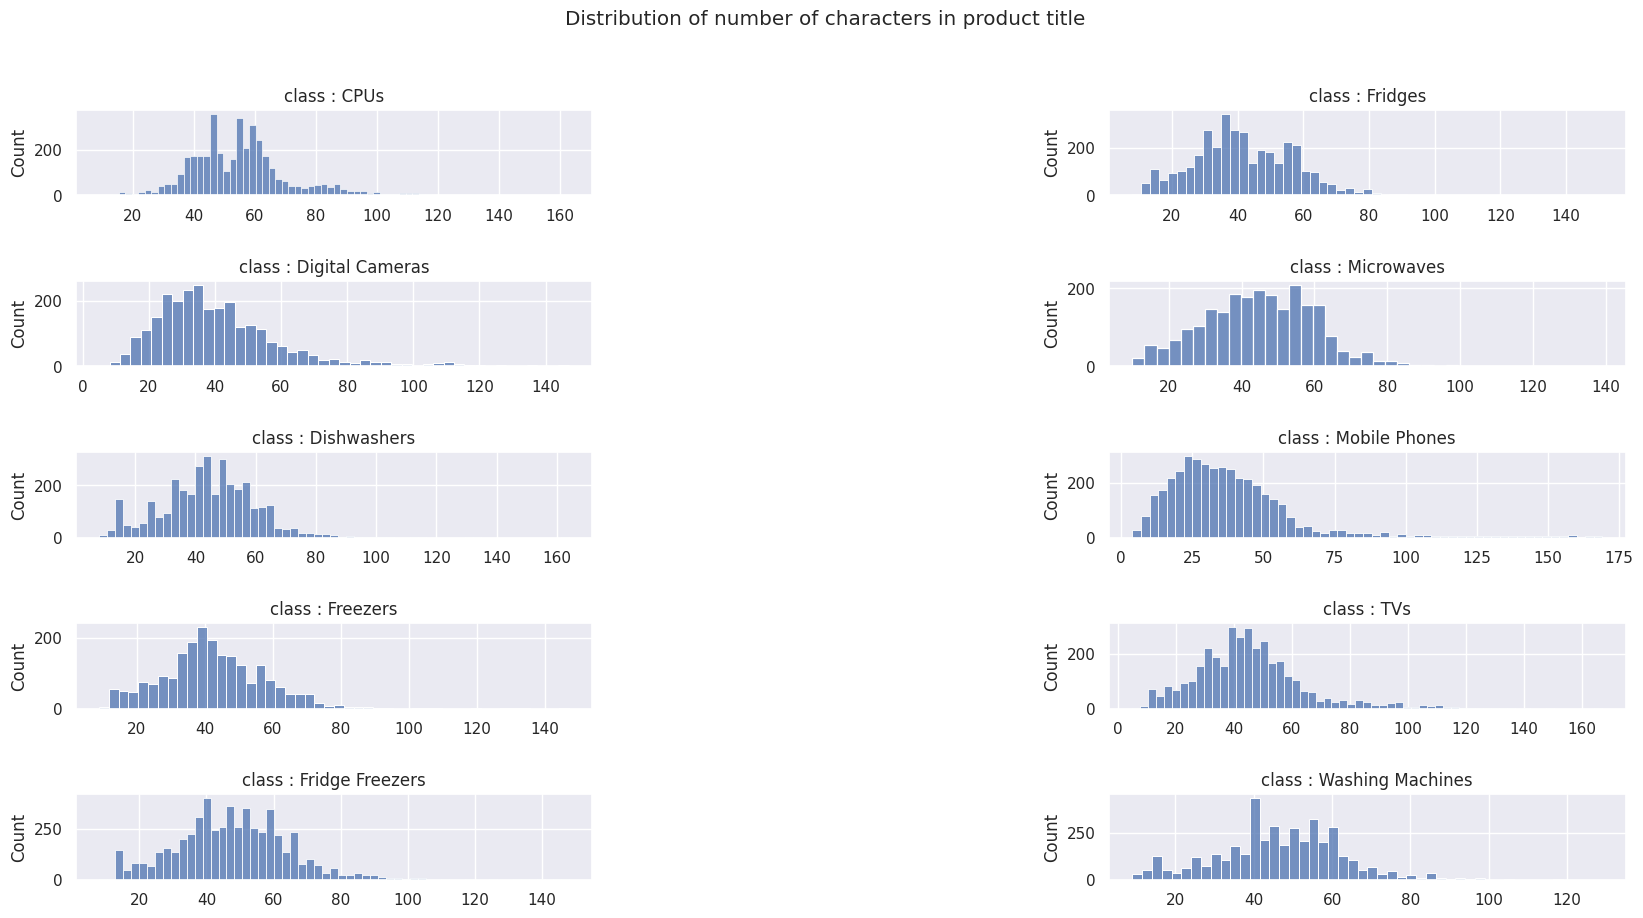

In [32]:
fig, ax = plt.subplots(5, 2, figsize = (20, 10), sharey = False)
fig.subplots_adjust(hspace=1, wspace=1)
fig.suptitle("Distribution of number of characters in product title")
for i, class_name in  enumerate(classes):
    if i < 5:
        ax_idx = ax[i, 0]
    else:
        ax_idx = ax[i%5, 1]
    sns.histplot(dataset.loc[dataset['category_label'] == class_name]['product_title_char_len'].to_numpy(), ax=ax_idx).set_title(f'class : {class_name}')        

In [33]:
vocab = dataset['product_title'].tolist()

In [34]:
vocab = [y for x in vocab for y in x.split(' ')]

In [35]:
vocab = list(set(vocab))

In [36]:
print('Unique Tokens in Product Title Vocab ', len(vocab))

Unique Tokens in Product Title Vocab  21188


## Number of tokens having numerical char in it

In [37]:
def has_numbers(text):
    return bool(re.search(r'\d', text))

In [38]:
word_with_num = [x for x in vocab if has_numbers(x)]

In [39]:
len(word_with_num)

16857

In [40]:
word_with_num[:20]

['gen2',
 'mab340c',
 'lwf28442g1400',
 'g5500t',
 'rk6192ew',
 'gvs169dc3b',
 'bel553ms0b',
 'oled65c8',
 'e5506',
 't20',
 'sn48r561de',
 'wkr771wps',
 '3.00',
 'i576003.50ghz',
 'gp2433',
 '55x9863db',
 '4460t',
 'mn8x2zd/a',
 'd850',
 'dscrx10m4']

##  Number of token with punctuation in them

In [41]:
def has_punc(text):
    return bool(re.search(r'[^\w\s]', text))

In [42]:
word_with_punc = [x for x in vocab if has_punc(x)]

In [43]:
len(word_with_punc)

2362

In [44]:
word_with_punc[:20]

['3.00',
 'i576003.50ghz',
 'mn8x2zd/a',
 '55.4cm',
 '3.00ghz',
 'lsg1545w/lsg1545w',
 'wmaqf721p/wmaqf721p',
 'cm/2',
 'c/t/t2',
 'kfn37232id/kfn37232id',
 '2000d/eos',
 '8gt/s',
 '11.8',
 '/gefrierschrank',
 '13.75mb',
 'khlschr.',
 'ws/kfn28132',
 '200/4.5',
 'wat286h0gb/wat286h0gb',
 '6.6cf']

## A lot of tokens have / in them probably describing the version, so in preprocessing puncutation is replaced with ' '

## Analysis of Cluster Name

In [45]:
dataset['cluster_label'] = dataset['cluster_label'].apply(lambda x : x.lower())

In [46]:
cluster_name_vocab = dataset['cluster_label'].tolist()

In [47]:
cluster_name_vocab = [y for x in cluster_name_vocab for y in x.split(' ')]

In [48]:
cluster_name_vocab = list(set(cluster_name_vocab))

In [49]:
print('Unique Tokens in Cluster Name Vocab ', len(cluster_name_vocab))

Unique Tokens in Cluster Name Vocab  12250


In [50]:
cluster_word_with_num = [x for x in cluster_name_vocab if has_numbers(x)]

In [51]:
cluster_word_with_num[:20]

['rii1232a+',
 'r2',
 'huz107.1',
 'tf55142b',
 'mab340c',
 'raa29s',
 'r344rdm',
 's581c40x0e',
 'h56w20s0gb',
 'rbi4061aw',
 'zbf11421sv',
 'sps24cw00e',
 'kgv36ve32s',
 'co312',
 'rk6192ew',
 '15-1',
 'gvs169dc3b',
 'bel553ms0b',
 'e5506',
 'bhwmd742']

#### Check Overlap of Cluster Vocab and Product Title Vocab

In [52]:
len(set(cluster_name_vocab).intersection(set(vocab)))

9227

## After Removing Punctuations in Product Title

In [53]:
def remove_punctuation(text) :
    return re.sub(r'[^\w\s]',' ', text)

In [54]:
dataset['product_title'] = dataset['product_title'].apply(lambda x : remove_punctuation(x))

In [55]:
vocab = dataset['product_title'].tolist()

In [56]:
vocab = [y for x in vocab for y in x.split(' ')]

In [57]:
vocab = list(set(vocab))

In [58]:
print('Unique Tokens in Product Title Vocab ', len(vocab))

Unique Tokens in Product Title Vocab  19437


## Number of tokens having numerical char in it

In [59]:
def has_numbers(text):
    return bool(re.search(r'\d', text))

In [60]:
word_with_num = [x for x in vocab if has_numbers(x)]

In [61]:
len(word_with_num)

15311

## After Removing Punctuations in Cluster Label

In [62]:
dataset['cluster_label'] = dataset['cluster_label'].apply(lambda x : remove_punctuation(x))

In [63]:
cluster_name_vocab = dataset['cluster_label'].tolist()

In [64]:
cluster_name_vocab = [y for x in cluster_name_vocab for y in x.split(' ')]

In [65]:
cluster_name_vocab = list(set(cluster_name_vocab))

In [66]:
print('Unique Tokens in Cluster Name Vocab ', len(cluster_name_vocab))

Unique Tokens in Cluster Name Vocab  11932


In [67]:
len(set(cluster_name_vocab).intersection(set(vocab)))

10242

## Average Token Length

In [68]:
token_length = [len(x) for x in vocab]

Text(0.5, 1.0, 'Token Length')

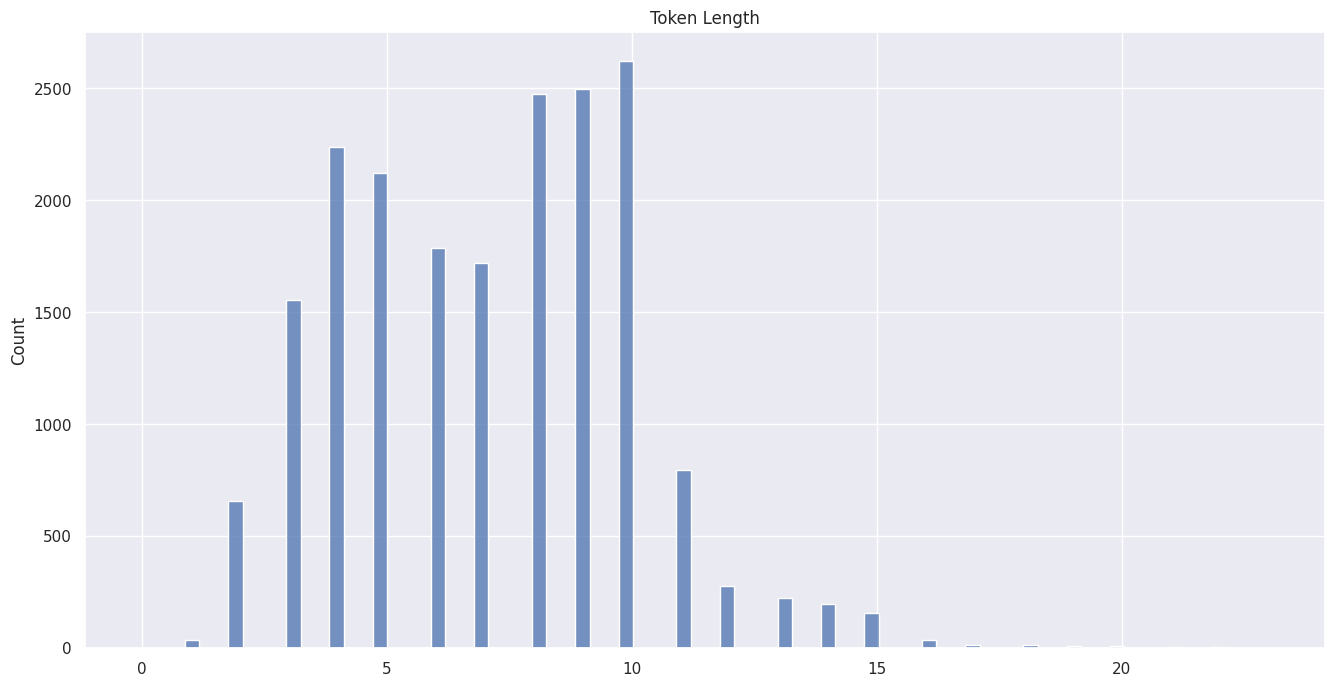

In [69]:
sns.histplot(token_length).set_title('Token Length')

In [70]:
print('Mean Token Length : ', np.mean(token_length))

Mean Token Length :  7.11529557030406


In [71]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [72]:
stop = stopwords.words('english')

In [73]:
stop_tokens = 0
for word in vocab:
    if word in stop:
        stop_tokens += 1

In [74]:
stop_tokens

58

## Save Pre-Processed Cluster Name and Original Cluster Name, will be used during deployment

In [75]:
dataset = pd.read_csv(os.path.join(ROOT_DATA_PATH, 'pricerunner_aggregate.csv'))

In [76]:
dataset = dataset.rename({'Product ID' : 'product_id', 'Product Title': 'product_title', ' Merchant ID' : 'merchant_id',
                    ' Category ID' : 'category_id', ' Category Label' : 'category_label', ' Cluster ID': 'cluster_id', ' Cluster Label' : 'cluster_label'}, axis=1)

In [80]:
dataset['preprocess_cluster_label'] = dataset['cluster_label'].apply(lambda x: lower_text(x))

In [81]:
dataset['preprocess_cluster_label'] = dataset['cluster_label'].apply(lambda x: remove_punctuation(x))
dataset['preprocess_cluster_label'] = dataset['cluster_label'].apply(lambda x: remove_stopwords(x))

In [92]:
unique_cluster_labels = dataset[~dataset.duplicated('cluster_label')][['cluster_label', 'preprocess_cluster_label']].reset_index(drop=True)

In [95]:
cluster_label_mapping = {}
for cluster_label, preprocess_cluster_label in zip(unique_cluster_labels['cluster_label'], unique_cluster_labels['preprocess_cluster_label']):
    cluster_label_mapping[preprocess_cluster_label] = cluster_label

In [99]:
with open('model_files/cluster_label_mapping.json', 'w') as f:
    json.dump(cluster_label_mapping, f)